## Test Beta Identifiability
Running the Particle Filter 6 times, each with a different dispersion value for the likelihood. 

Each run is on 200 particles. 

We plot the results to see if different dispersion values actually change the resulting betas output. 

In [2]:
from src.pmcmc.initialize_filter import initialize_particle_filter
import os
import pandas as pd

In [2]:
dispersion_values = [1, 5, 10, 20, 50, 75]
disp_to_pfoutput = {}

In [3]:
from src.pmcmc.location import Location
from jax.typing import ArrayLike
from src.pmcmc.helpers import get_previous_80_rows

def get_hosp_observations(location_code, target_date) -> (ArrayLike, Location):
    """
    Returns an array of hospital observations.
    Time series starts on 2023-06-25 and ends on target_date.
    """
    location = Location(location_code)
    target_date = pd.to_datetime(target_date)
    print(location.hosp_data)
    filtered_state_data = get_previous_80_rows(location.hosp_data, target_date)
    observations = filtered_state_data[
        "previous_day_admission_influenza_confirmed"
    ].values
    return observations, location

In [4]:
from src.pmcmc.logger import get_logger

loc_code = '04'
date = '2023-12-16'
observations, location = get_hosp_observations(location_code=loc_code, target_date=date)
logger = get_logger()

# Determine number of days for PF to estimate, based on length of data.
time_steps = len(observations)

location_settings = {
    "population": location.population,
    "location_code": loc_code,
    "target_date": date,
    "runtime": time_steps,
}

      Unnamed: 0        date state  previous_day_admission_influenza_confirmed
0          29858  2020-03-02    AZ                                         NaN
1          32036  2020-03-03    AZ                                         NaN
2          25438  2020-03-04    AZ                                         NaN
3          26421  2020-03-05    AZ                                         NaN
4          31011  2020-03-06    AZ                                         NaN
...          ...         ...   ...                                         ...
1513       70383  2024-04-23    AZ                                        15.0
1514       74168  2024-04-24    AZ                                        11.0
1515       66431  2024-04-25    AZ                                        13.0
1516       71719  2024-04-26    AZ                                        13.0
1517       73926  2024-04-27    AZ                                        19.0

[1518 rows x 4 columns]


In [5]:
for dispersion in dispersion_values:
    print(f"Running r = {dispersion}.")
    pf_algo = initialize_particle_filter(
                state_population=location_settings["population"],
                location_code=location_settings["location_code"],
                target_date=location_settings["target_date"],
                runtime=location_settings["runtime"],
                logger=logger,
                dispersion=dispersion
            )
    pf_output = pf_algo.run(
            observation_data=observations, theta={}
        )
    disp_to_pfoutput[dispersion] = pf_output

In [10]:
print(disp_to_pfoutput[10].betas.shape)

(200, 80)


In [11]:
import jax.numpy as jnp 

disp_to_mean_beta = {disp: jnp.median(pfoutput.betas, axis=0) for disp, pfoutput in disp_to_pfoutput.items()}

<function matplotlib.pyplot.show(close=None, block=None)>

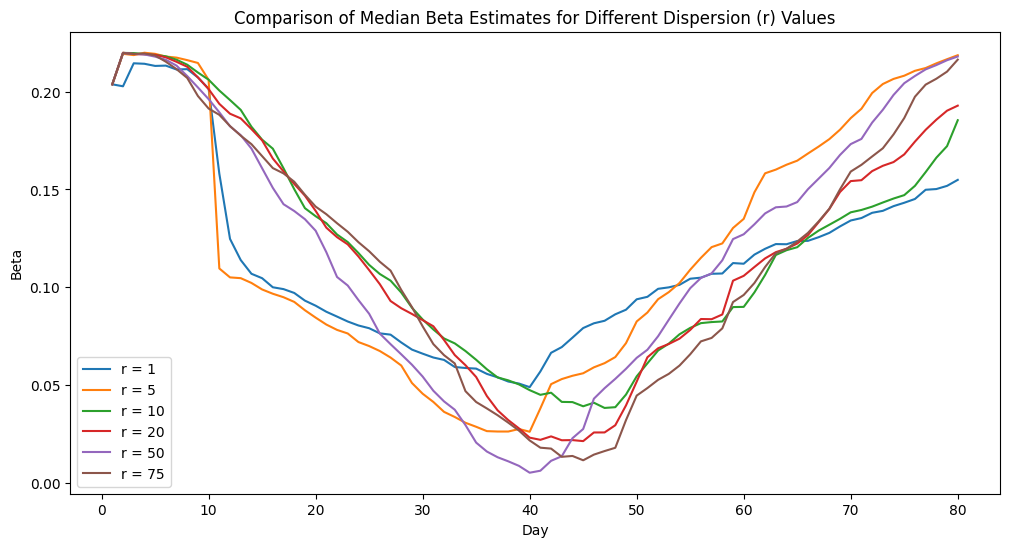

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
days = range(1,81)

for disp, mean_beta in disp_to_mean_beta.items():
    plt.plot(days, mean_beta, label=f"r = {disp}")
    
plt.xlabel("Day")
plt.ylabel("Beta")
plt.title("Comparison of Median Beta Estimates for Different Dispersion (r) Values")
plt.legend()
plt.show

In [25]:
disp_values_2 = [20, 25, 30, 35, 40]

for dispersion in disp_values_2:
    print(f"Running r = {dispersion}.")
    pf_algo = initialize_particle_filter(
                state_population=location_settings["population"],
                location_code=location_settings["location_code"],
                target_date=location_settings["target_date"],
                runtime=location_settings["runtime"],
                logger=logger,
                dispersion=dispersion
            )
    pf_output = pf_algo.run(
            observation_data=observations, theta={}
        )
    disp_to_pfoutput[dispersion] = pf_output

Running r = 20.


Running r = 25.


Running r = 30.


Running r = 35.


Running r = 40.


In [26]:
disp_to_mean_beta_2 = {disp: jnp.median(pfoutput.betas, axis=0) for disp, pfoutput in disp_to_pfoutput.items()}

<function matplotlib.pyplot.show(close=None, block=None)>

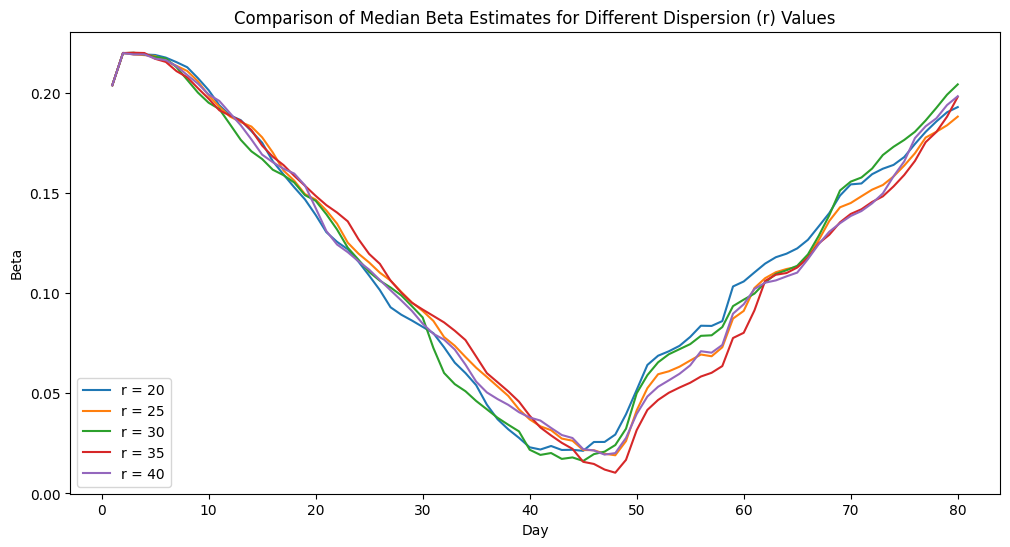

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
days = range(1,81)

for disp, mean_beta in disp_to_mean_beta_2.items():
    if disp in [1, 5, 10, 50, 75]:
        continue
    plt.plot(days, mean_beta, label=f"r = {disp}")
    
plt.xlabel("Day")
plt.ylabel("Beta")
plt.title("Comparison of Median Beta Estimates for Different Dispersion (r) Values")
plt.legend()
plt.show

In [5]:
disp_values_3 = [25, 28, 31, 34, 37]
disp_to_pfoutput_3 = {}

for dispersion in disp_values_3:
    print(f"Running r = {dispersion}.")
    pf_algo = initialize_particle_filter(
                state_population=location_settings["population"],
                location_code=location_settings["location_code"],
                target_date=location_settings["target_date"],
                runtime=location_settings["runtime"],
                logger=logger,
                dispersion=dispersion
            )
    pf_output = pf_algo.run(
            observation_data=observations, theta={}
        )
    disp_to_pfoutput_3[dispersion] = pf_output

Running r = 25.


Running r = 28.


Running r = 31.


Running r = 34.


Running r = 37.


In [8]:
import jax.numpy as jnp
disp_to_mean_beta_3 = {disp: jnp.median(pfoutput.betas, axis=0) for disp, pfoutput in disp_to_pfoutput_3.items()}

<function matplotlib.pyplot.show(close=None, block=None)>

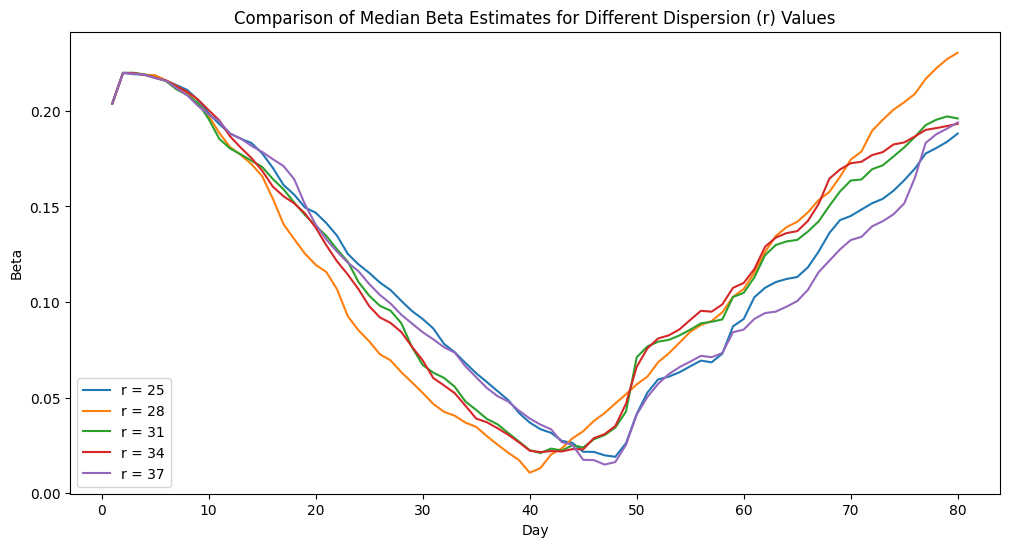

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
days = range(1,81)

for disp, mean_beta in disp_to_mean_beta_3.items():
    plt.plot(days, mean_beta, label=f"r = {disp}")
    
plt.xlabel("Day")
plt.ylabel("Beta")
plt.title("Comparison of Median Beta Estimates for Different Dispersion (r) Values")
plt.legend()
plt.show

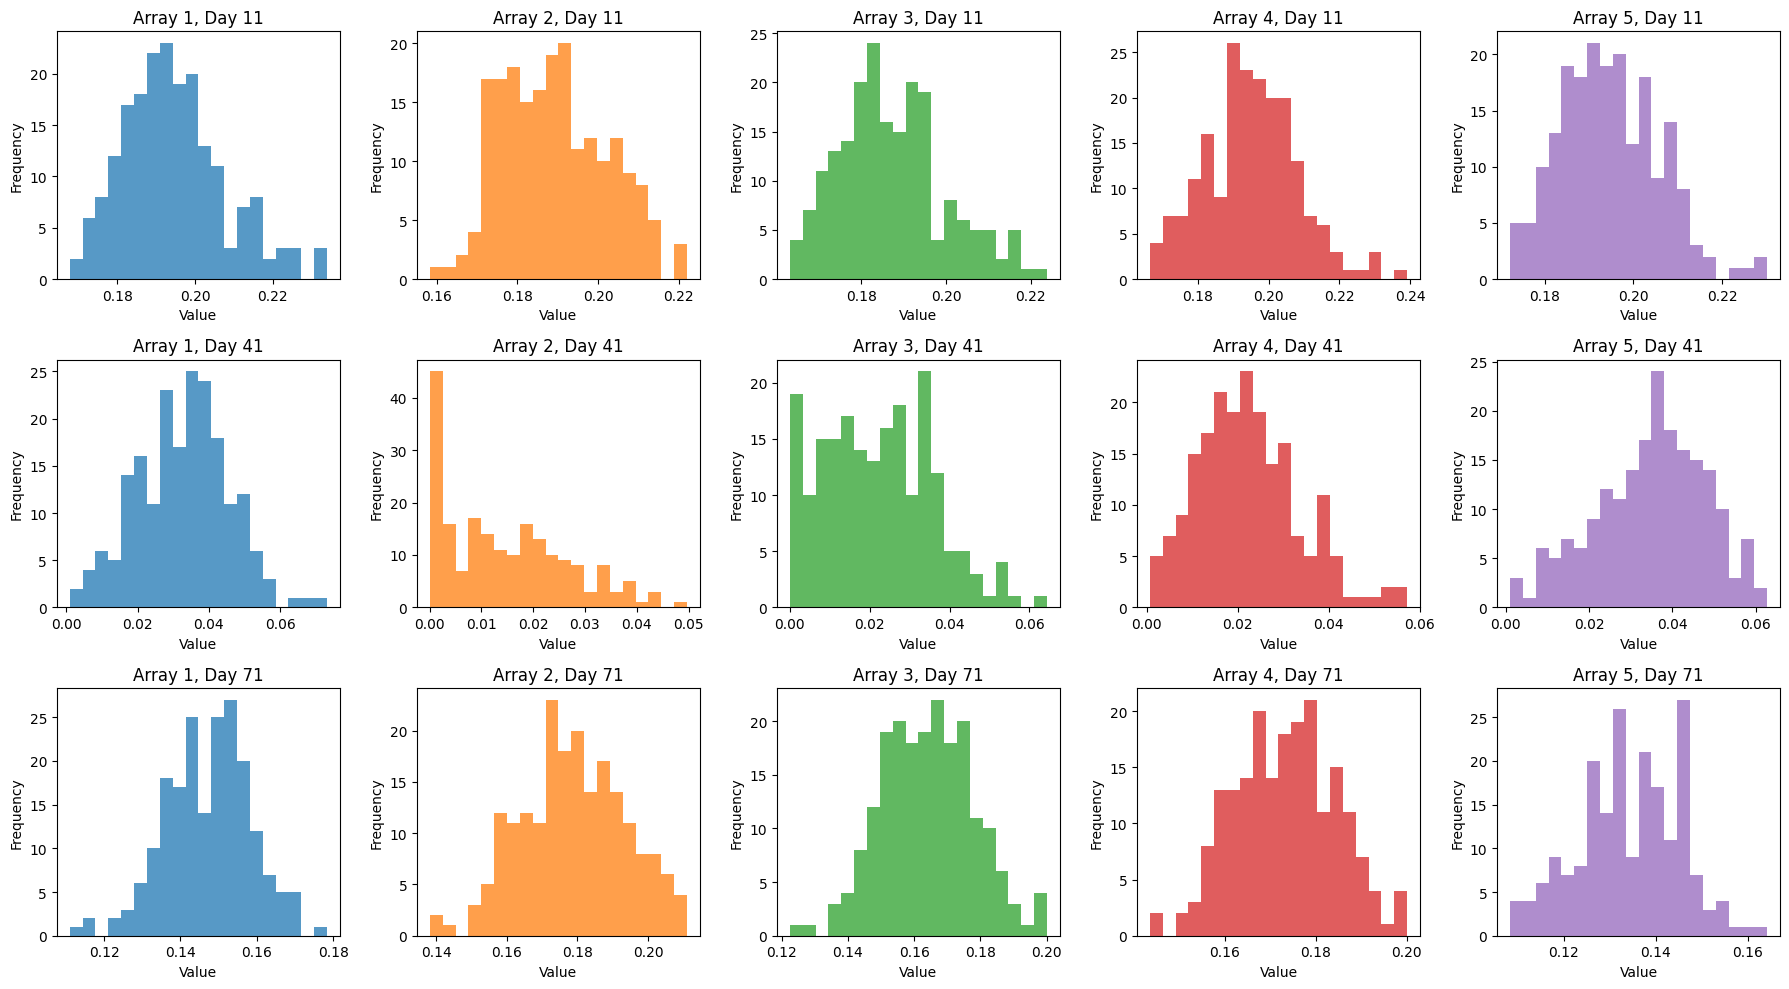

In [10]:
# Plot a histogram of the particle distributions
import jax.numpy as jnp
import matplotlib.pyplot as plt

arrays = [pfoutput.betas for pfoutput in disp_to_pfoutput_3.values()]

days_to_plot = [10, 40, 70]  # Adjust as needed

n_particles = 200

n_arrays = len(arrays)
n_days = len(days_to_plot)

# Create subplots: one row per day, and six columns for the six arrays
fig, axs = plt.subplots(n_days, n_arrays, figsize=(18, 10))

for i, day in enumerate(days_to_plot):
    for j, array in enumerate(arrays):
        particles = array[:, day]  # array[:, day] gives the 200 particles for 'day'

        # Plot histogram for the current day and array
        axs[i, j].hist(particles, bins=20, alpha=0.75, color=f"C{j}")

        # Labeling the plots
        axs[i, j].set_title(f"Array {j+1}, Day {day+1}")
        axs[i, j].set_xlabel('Value')
        axs[i, j].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
